# Laboratorio 3
## Análisis de Datos con Python
#### Carlos Alfredo Rivera Yong 23008861

1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [2]:
tamaño = 1000 * 1
print(f"El tamaño del array de 1000 elementos booleanos es de {tamaño} bytes.")

El tamaño del array de 1000 elementos booleanos es de 1000 bytes.


2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [3]:
array = list(range(2, 101, 2))[::-1]
print(array[-10:])

[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]


3) Dado el array
2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1
Seleccione con una instrucción el subarray de elementos
0 3 7 4
Después, seleccione el subarray de elementos
2 5
8 5

In [4]:
import numpy as np
array = np.array([[2, 4, 5, 6],
                  [0, 3, 7, 4],
                  [8, 8, 5, 2],
                  [1, 5, 6, 1]])
subarray1 = array[1]
print(subarray1)
subarray2 = array[2:4, 0:3:2]
print(subarray2)

[0 3 7 4]
[[8 5]
 [1 6]]


4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [ ]:
import numpy as np
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
diferencia = a - b
media = np.mean(diferencia)
print(f"La media aritmética de la diferencia (a-b) es {media}.")

5) Tengo valores de cordenadas (x, y) en las columnas del array
1.33 4.5
30.0 10.7
70.2 0.5

In [5]:
import numpy as np
arr = np.array([[1.33, 4.5],
                [30.0, 10.7],
                [70.2, 0.5]])
arr = np.append(arr, [[37.1, -3.6]], axis=0)
print(np.shape(arr))

(4, 2)


6) Copie el array del ejercicio anterior. Traspóngalo (.Agregue ahora dos nuevos pares de coordenadas: (10.8,
3.0) y (35.8, 12.0).

In [6]:
import numpy as np
arr = np.array([[1.33, 4.5],
                [30.0, 10.7],
                [70.2, 0.5],
                [37.1, -3.6]])
arr_transp = np.transpose(arr.copy())
arr_transp = np.append(arr_transp, [[10.8, 3.0], [35.8, 12.0]], axis=1)
print(np.shape(arr_transp))

(2, 6)


### Parte 2  Exploración y Minería de Datos
Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

In [7]:
import matplotlib.pyplot as mpl
import pandas as pds

In [12]:
data = pds.read_csv("NucleosPoblacion.csv")
print(data)

     FID  OBJECTID                           Texto  Poblacion  CodMun  \
0      0         1                         Agüimes    29431.0   35002   
1      1         2                         Antigua    10458.0   35003   
2      2         3                        Arrecife    58156.0   35004   
3      3         4                          Arucas    36745.0   35006   
4      4         5                          Gáldar    24473.0   35009   
..   ...       ...                             ...        ...     ...   
847  847       848             Infante Juan Manuel    14192.0   30030   
848  848       849           Santa Maria de Gracia    13349.0   30030   
849  849       850                    Vista Alegre    15208.0   30030   
850  850       851  Poligono Sta M de Benquerencia    19177.0   45168   
851  851       852                            Grao    16367.0   12040   

                                      Municipio  CodProvin  \
0                                       Agüimes         35   

1) ¿Cuántos Municipios tienen más de 100000 habitantes?

In [16]:
municipios_mayor_100k = data[data['Poblacion']>100000]
municipios=len(municipios_mayor_100k)
print(f"Existen {municipios} municipios con mas de 100000 habitantes.")

Existen 62 municipios con mas de 100000 habitantes.


2) Realice una gráfica de barras sobre la polbación de cada
ciudad, ordenela de menor a mayo y responda:
a. ¿Cuál es la segunda ciudad más poblada?
b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

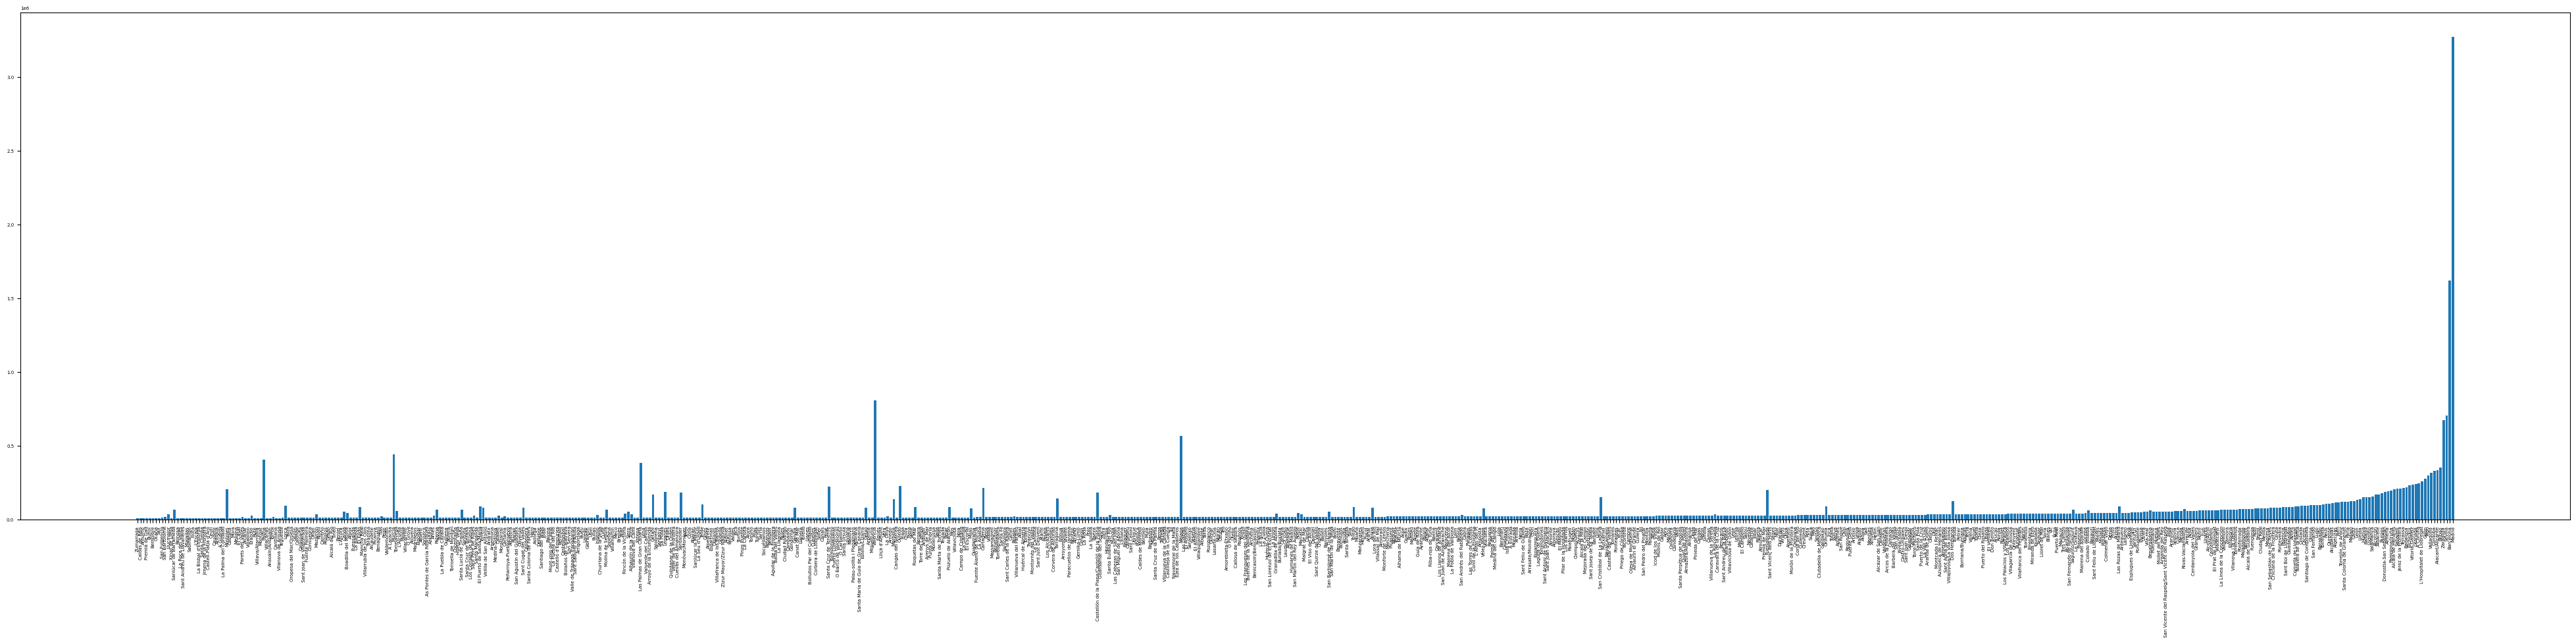

La segunda ciudad con mayor poblacion es:Caldas de Reis.
Granada tiene la posición 272 en el ranking


In [27]:
data = data.sort_values('Poblacion')
mpl.figure(figsize=(50,10))
mpl.rcParams.update({'font.size':5})
mpl.bar(data['Municipio'], data['Poblacion'],)
mpl.xticks(rotation=90)
mpl.show()

ciudad2 = data['Municipio'].iloc[1]
print(f"La segunda ciudad con mayor poblacion es:{ciudad2}.")

rkngranada = data[data["Municipio"] == "Granada"].index.item()
print(f"Granada tiene la posición {rkngranada} en el ranking")

3) ¿Cuántos municipios de Extremadura tienen más de 5000
habitantes?

In [28]:
municipios_extremadura = data[(data['Poblacion'] > 5000) & ((data['Provincia'] == 'Cáceres') | (data['Provincia'] == 'Badajoz'))]['Municipio'].nunique()
print(f"Los municipios con mas de 5000 habitantes de Extremadura son: {municipios_extremadura}.")

Los municipios con mas de 5000 habitantes de Extremadura son: 14.


4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [31]:
municipios_mas_al_norte = data.sort_values(by='Y', ascending=False).iloc[0]
print("El municipio situado  más al norte es:", municipios_mas_al_norte['Municipio'])
print("provincia de", municipios_mas_al_norte['Provincia'])
print("población de", municipios_mas_al_norte['Poblacion'], "habitantes")

El municipio situado  más al norte es: Viveiro
provincia de Lugo
población de 16211.0 habitantes


5) Obtenga la media, mediana, desviación estándar, valor
máximo y valor mínimo de la población de los municipios
de la provincia de Granada.  

In [37]:
granada = data[data['Provincia'] == 'Granada']
print(f"La media de la población de Granada es: {granada['Poblacion'].mean()}.")
print(f"La mediana de la población de Granada es: {granada['Poblacion'].median()}.")
print(f"La desviacion estandar de la población de Granada es: {granada['Poblacion'].std()}.")
print(f"El valor maximo de la población de Granada es: {granada['Poblacion'].max()}.")
print(f"El valor minimo de la población de Granada es: {granada['Poblacion'].min()}.")

La media de la población de Granada es: 30217.85.
La mediana de la población de Granada es: 17526.0.
La desviacion estandar de la población de Granada es: 50355.49171459277.
El valor maximo de la población de Granada es: 239154.0.
El valor minimo de la población de Granada es: 10386.0.


6) Realice un histograma con la población de los
Municipios para cada una de las provincias.

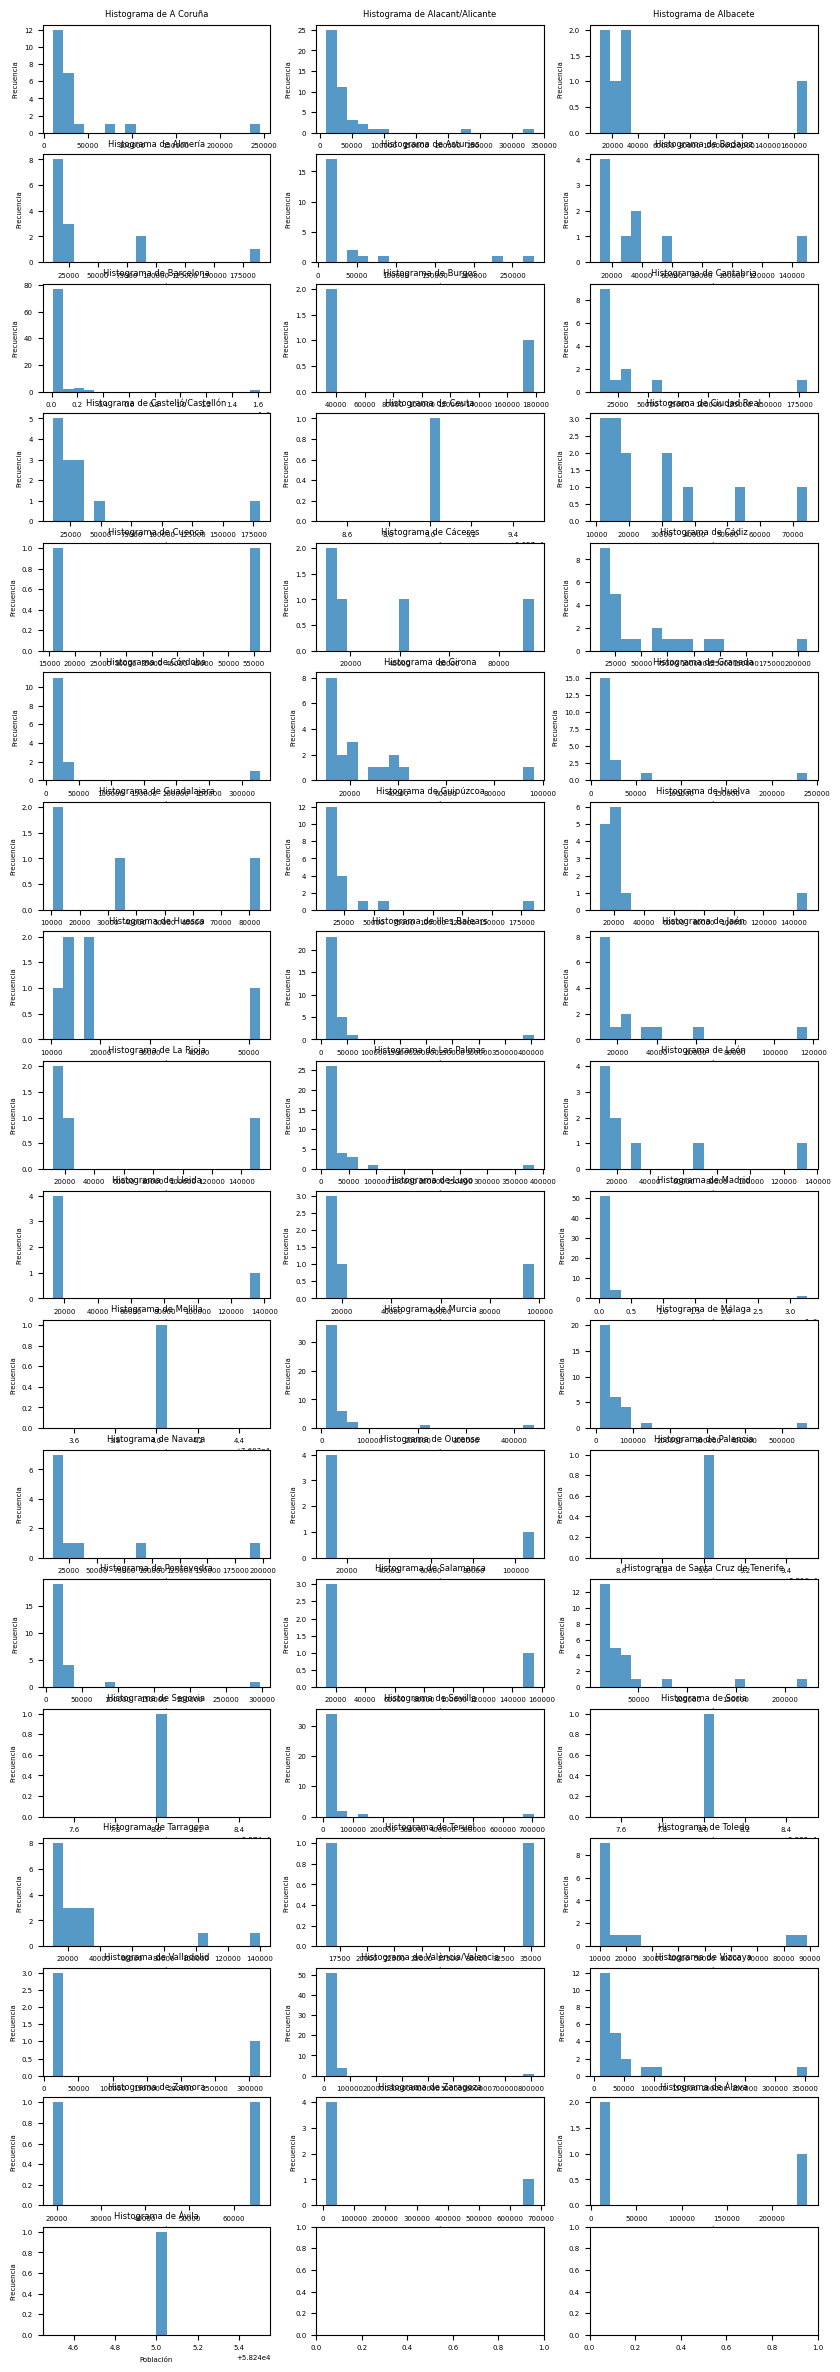

In [48]:
figura, ejes = mpl.subplots(nrows=18, ncols=3, figsize=(10,30))
provincias = data.groupby('Provincia')
graficas = []

for i, (provincia, grupo) in enumerate(provincias):
    ax = ejes[i // 3, i % 3]
    grupo['Poblacion'].plot.hist(alpha=0.75, bins=20, ax=ax)
    ax.set_ylabel("Frecuencia")
    ax.set_xlabel("Población")
    ax.set_title("Histograma de " + provincia)
    graficas.append(ax)

mpl.show()

7) Seleccione al azar cincuenta municipios diferentes de
entre los diponibles en el archivo. Asegúrese de que no
se repitan. ¿Luego calcule el promedio de la población y
la desviación estándar de esto 50 municipios?.


In [49]:
municipios_aleatorios = data['Municipio'].sample(n=50, replace=False)
datos_mun_aleatorios = data[data['Municipio'].isin(municipios_aleatorios)]

print(f"Promedio de la población de los 50 municipios: {datos_mun_aleatorios['Poblacion'].mean()}.")
print(f"Promedio de la población de los 50 municipios: {datos_mun_aleatorios['Poblacion'].std()}.")


Promedio de la población de los 50 municipios: 50227.57142857143.
Promedio de la población de los 50 municipios: 85214.38603797773.


8) Dígame los nombres de los Municipios más cercano y más
lejano a Madrid. Para ello debe calcular la distancia en
todos ellos y Madrid. No considere a Madrid en el
análisis ya que la distancia sería cero.

In [50]:
from math import radians, sin, cos, sqrt, atan2

def calcular_distancia(lat1, lon1, lat2, lon2):
    R = 6371 # Radio de la tierra en km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distancia = R * c
    return distancia

lat_madrid, lon_madrid = radians(40.4167754), radians(-3.7037902)

distancias = []
for i, row in data.iterrows():
    if row['Municipio'] == 'Madrid':
        continue
    lat_mun, lon_mun = radians(row['Y']), radians(row['X'])
    distancia = calcular_distancia(lat_madrid, lon_madrid, lat_mun, lon_mun)
    distancias.append((row['Municipio'], row['Provincia'], row['Poblacion'], distancia))

distancias_df = pds.DataFrame(distancias, columns=['Municipio', 'Provincia', 'Poblacion', 'Distancia'])
mas_cercano = distancias_df.loc[distancias_df['Distancia'].idxmin()]
mas_lejano = distancias_df.loc[distancias_df['Distancia'].idxmax()]

print("Municipio más cercano a Madrid:")
print(" - Nombre: ", mas_cercano['Municipio'])
print(" - Provincia: ", mas_cercano['Provincia'])
print(" - Poblacion: ", mas_cercano['Poblacion'])
print(" - Distancia (km): ", round(mas_cercano['Distancia'], 2))

print("Municipio más lejano a Madrid:")
print(" - Nombre: ", mas_lejano['Municipio'])
print(" - Provincia: ", mas_lejano['Provincia'])
print(" - Poblacion: ", mas_lejano['Poblacion'])
print(" - Distancia (km): ", round(mas_lejano['Distancia'], 2))

Municipio más cercano a Madrid:
 - Nombre:  Pozuelo de Alarcón
 - Provincia:  Madrid
 - Poblacion:  14800.0
 - Distancia (km):  0.16
Municipio más lejano a Madrid:
 - Nombre:  Los Llanos de Aridane
 - Provincia:  Santa Cruz de Tenerife
 - Poblacion:  20948.0
 - Distancia (km):  35.79
